# Example 1: Three Localities Community 

Example 1 illustrates how the resilience of a simple community with five components located in three localities can be assessed using **pyrecodes**.

Components considered in Example 1 are Base Transceiver Stations (BTS), Electric Power Plant (EPP), Cooling Water Facility (CWF), Building Stock Unit (BSU) and links transferring resources among components.

![ThreeLocalitiesCommunity](./Example%201/Example_1_Community.png)


## Input data

Three files are needed to construct the model:
- **Component library** file: input file defining the blueprints for system’s components.
- **System Configuration** file: input file defining the spatial and temporal discretization of the system, component locations, considered resources and resilience calculators.
- **main** file: input file defining the classes and path to files of the component library and the system.

In this Example, these files are in a JSON format.

In [2]:
from pyrecodes import main
system = main.run('./Example 1/ThreeLocalitiesCommunity_Main.json')

system.calculate_resilience()


Resilience assessment finished.


[{'ElectricPower': 30.400000000000002,
  'CoolingWater': 11.0,
  'Communication': 60.082792050515444},
 [{'Resource': 'ElectricPower',
   'DesiredFunctionalityLevel': 0.95,
   'Scope': 'All',
   'MetAtTimeStep': 12},
  {'Resource': 'CoolingWater',
   'DesiredFunctionalityLevel': 0.9,
   'Scope': 'All',
   'MetAtTimeStep': 12},
  {'Resource': 'Communication',
   'DesiredFunctionalityLevel': 0.8,
   'Scope': 'All',
   'MetAtTimeStep': 12}]]

## Plotting resilience assessment results 

Class **Plotter** is used to create supply/demand/consumption plots and gantt charts illustrating system's recovery.

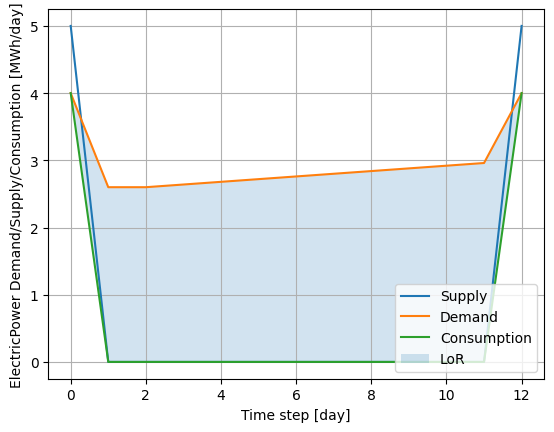

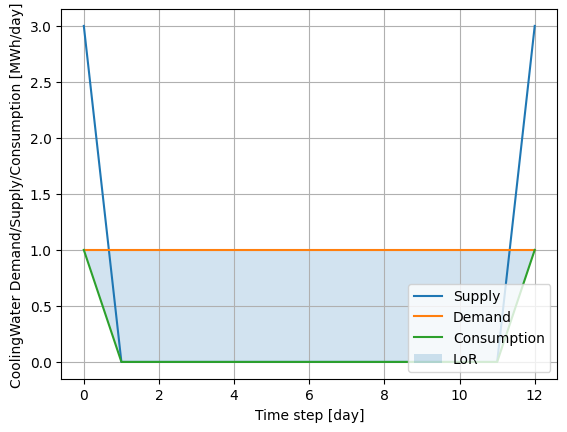

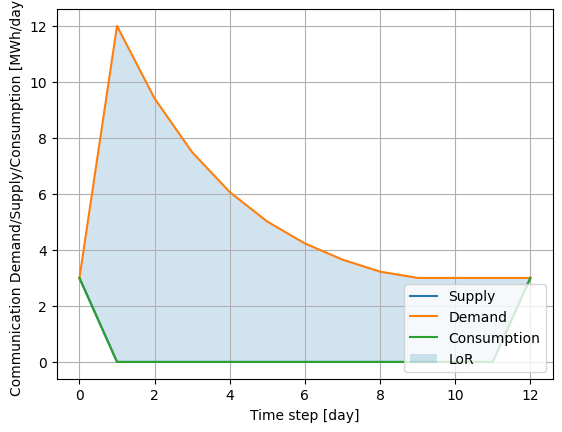

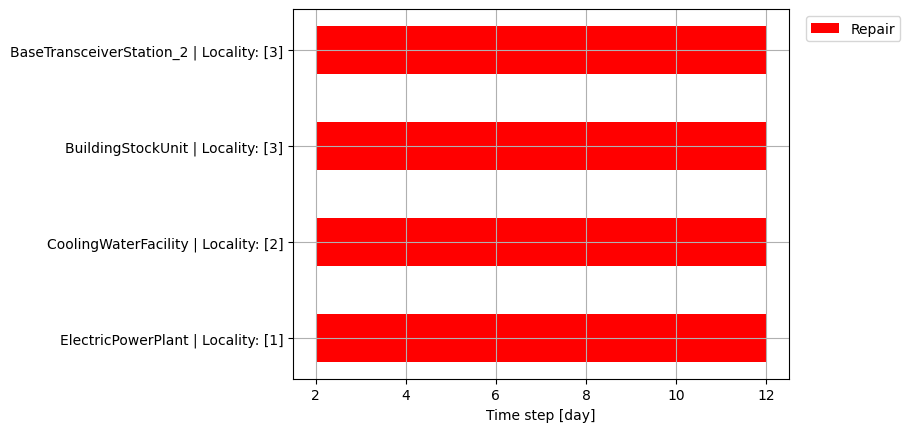

In [4]:
from pyrecodes import Plotter

plotter_object = Plotter.Plotter()
x_axis_label = 'Time step [day]'
resource_names = ['ElectricPower', 'CoolingWater', 'Communication']
for resource_name in resource_names:
    y_axis_label = f'{resource_name} Demand/Supply/Consumption [MWh/day]'
    axis_object = plotter_object.setup_lor_plot_fig(x_axis_label, y_axis_label)
    plotter_object.plot_single_resource(list(range(system.time_step+1)), system.resilience_calculators[0].system_supply[resource_name], 
                                        system.resilience_calculators[0].system_demand[resource_name], 
                                        system.resilience_calculators[0].system_consumption[resource_name], axis_object)

axis_object = plotter_object.setup_gantt_chart_fig(x_axis_label, system.components)
plotter_object.plot_gantt_chart(system.components, axis_object)